In [189]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import random

In [190]:
np.random.seed(0)

In [191]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [192]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [193]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1:] == (28,28))
num_pixels =  X_train.shape[1]*X_train.shape[2]

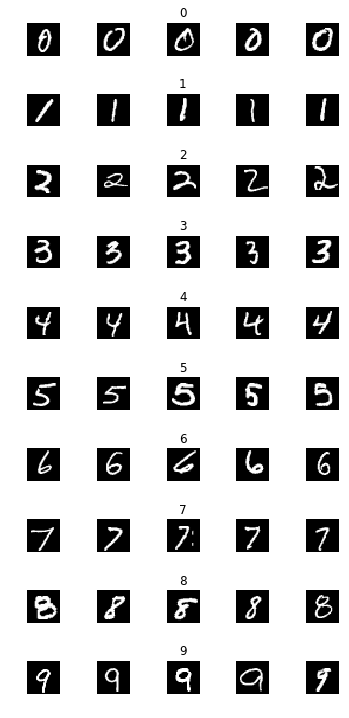

In [194]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,: ], cmap=plt.get_cmap('gray'))
#         turn the axis notation off
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))

Text(0, 0.5, 'Number of images')

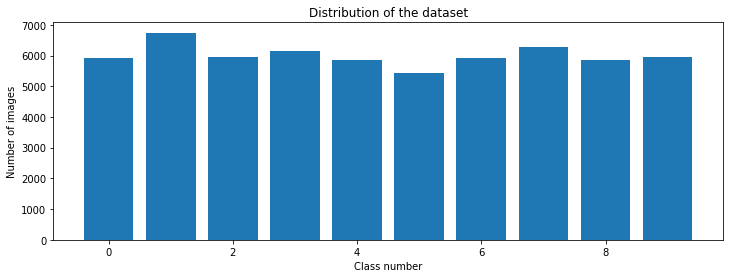

In [195]:
num_of_samples = []
for j in range(num_classes):
        num_of_samples.append((len(X_train[y_train == j])))
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title('Distribution of the dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

Convert the output labels to categorical

In [196]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Normalize our training input data: values from 0 to 1.
Right now max value is 255 (pixel gray scale max)

In [197]:
max_value = 255
X_train = X_train/max_value
X_test = X_test/max_value

Flatten the 2D images, into a 1D array:

In [198]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [199]:
def create_model():
    model = Sequential()
    model.add(Dense(50, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [200]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
Total params: 41,200
Trainable params: 41,200
Non-trainable params: 0
_________________________________________________________________
None


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.3728 - acc: 0.8894 - val_loss: 0.1650 - val_acc: 0.9520
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1676 - acc: 0.9499 - val_loss: 0.1395 - val_acc: 0.9593
Epoch 3/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.1348 - acc: 0.9589 - val_loss: 0.1320 - val_acc: 0.9643
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1156 - acc: 0.9653 - val_loss: 0.1224 - val_acc: 0.9663
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1008 - acc: 0.9690 - val_loss: 0.1388 - val_acc: 0.9605
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0900 - acc: 0.9726 - val_loss: 0.1308 - val_acc: 0.9635
Epoch 7/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0851 - acc: 0.9740 - val_loss: 0.1295 - val_acc:

Text(0.5, 0, 'epoch')

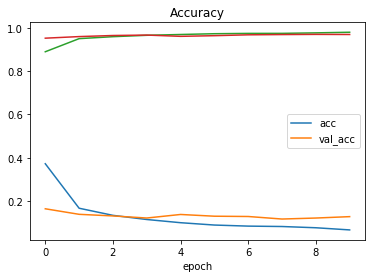

In [201]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [202]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.13200964886335423
Test accuracy: 0.9661


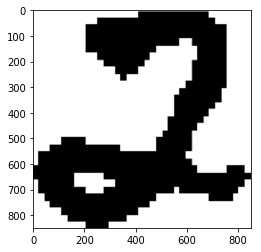

In [203]:
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

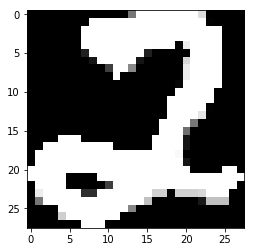

In [204]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [205]:
img = img/max_value
img = img.reshape(1, num_pixels)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]
